<a href="https://colab.research.google.com/github/MrEgyptian/AI_Penis_Detector/blob/main/Penis_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [600]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os


# New Section

In [601]:
data=tf.keras.utils.image_dataset_from_directory(directory=".",
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear')

Found 268 files belonging to 2 classes.
Using 215 files for training.


In [602]:

valid_data = tf.keras.utils.image_dataset_from_directory(
    directory='.',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation',
    interpolation='bilinear'
)

Found 268 files belonging to 2 classes.
Using 53 files for validation.


In [603]:

# CNN model Thingy :)
model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(480, 480, 3)))
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [604]:

# Compiling time yastaaaAAAAAAAAAAAAAA
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [605]:

# Training model time :)
acc=model.fit(data, epochs=10, validation_data=valid_data)


Epoch 1/10
7/7 [==============================] - 55s 6s/step - loss: 0.7141 - accuracy: 0.5302 - val_loss: 0.6924 - val_accuracy: 0.5283
Epoch 2/10
7/7 [==============================] - 39s 6s/step - loss: 0.6945 - accuracy: 0.4930 - val_loss: 0.6932 - val_accuracy: 0.5283
Epoch 3/10
7/7 [==============================] - 34s 5s/step - loss: 0.6935 - accuracy: 0.4372 - val_loss: 0.6935 - val_accuracy: 0.4717
Epoch 4/10
7/7 [==============================] - 34s 5s/step - loss: 0.6935 - accuracy: 0.4791 - val_loss: 0.6932 - val_accuracy: 0.5283
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 0.6932 - accuracy: 0.4744 - val_loss: 0.6934 - val_accuracy: 0.4528
Epoch 6/10
7/7 [==============================] - 36s 5s/step - loss: 0.6933 - accuracy: 0.4605 - val_loss: 0.6943 - val_accuracy: 0.4528
Epoch 7/10
7/7 [==============================] - 42s 6s/step - loss: 0.6932 - accuracy: 0.5163 - val_loss: 0.6953 - val_accuracy: 0.3962
Epoch 8/10
7/7 [==================

In [606]:
his=acc.history
his

{'loss': [0.7140607237815857,
  0.6945170760154724,
  0.693464994430542,
  0.6934630870819092,
  0.6932191848754883,
  0.6932744979858398,
  0.6932154893875122,
  0.6928809881210327,
  0.6928638815879822,
  0.693042516708374],
 'accuracy': [0.5302325487136841,
  0.49302324652671814,
  0.4372093081474304,
  0.4790697693824768,
  0.47441861033439636,
  0.46046510338783264,
  0.5162790417671204,
  0.5627906918525696,
  0.5302325487136841,
  0.5162790417671204],
 'val_loss': [0.6924492716789246,
  0.6931933760643005,
  0.6934801340103149,
  0.6932192444801331,
  0.6934008598327637,
  0.6943215131759644,
  0.6953112483024597,
  0.6947263479232788,
  0.6970030665397644,
  0.7077799439430237],
 'val_accuracy': [0.5283018946647644,
  0.5283018946647644,
  0.4716981053352356,
  0.5283018946647644,
  0.4528301954269409,
  0.4528301954269409,
  0.3962264060974121,
  0.37735849618911743,
  0.37735849618911743,
  0.4150943458080292]}

In [607]:
model.save('dick.keras')

In [608]:
(test_loss, test_acc)=(his['loss'],his['accuracy'])
# Evaluate the model
test_loss, test_acc = model.evaluate(valid_data)
print(f'Test accuracy: {test_acc}')


2/2 [==============================] - 2s 655ms/step - loss: 0.7078 - accuracy: 0.4151
Test accuracy: 0.4150943458080292


In [609]:
from PIL import Image

In [610]:

def resize_image(input_path, output_path, size=(480, 480), format="JPEG"):
    try:
        # Open the image file
        with Image.open(input_path) as img:
            # Convert image mode to 'RGB' if it has an alpha channel
            if img.mode in ('RGBA', 'LA') or (img.mode == 'P' and 'transparency' in img.info):
                img = img.convert('RGB')
            # Resize the image
            resized_img = img.resize(size)
            # Save the resized image
            resized_img.save(output_path, format=format)
            print(f"Image resized and saved to {output_path}")
            return resize_image
    except Exception as e:
        print(f"Error: {e}")

In [611]:
img=resize_image('penis.png','penis.jpg')

Image resized and saved to penis.jpg


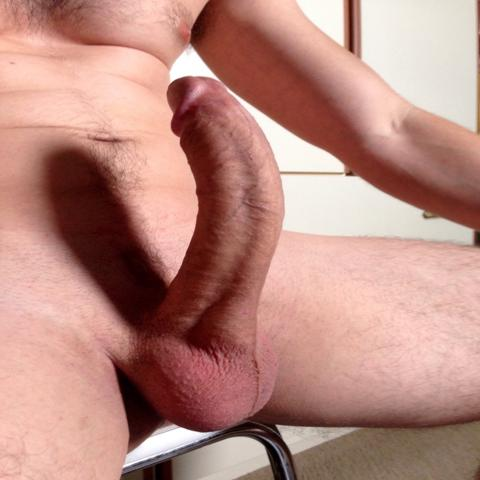

In [612]:
img=tf.keras.utils.load_img('penis.jpg')
img

In [613]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [614]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [615]:
model.predict(img_array)

1/1 [==============================] - 0s 211ms/step


array([[0.49417856]], dtype=float32)

In [616]:
img=resize_image('dick0.png','dick0.jpg')

Image resized and saved to dick0.jpg


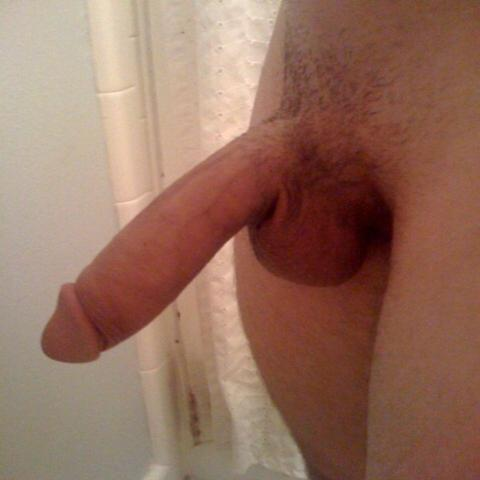

In [617]:


img=tf.keras.utils.load_img('dick0.jpg')
img

In [618]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape


(480, 480, 3)

In [619]:
img=resize_image('dick1.png','dick1.jpg')

Image resized and saved to dick1.jpg


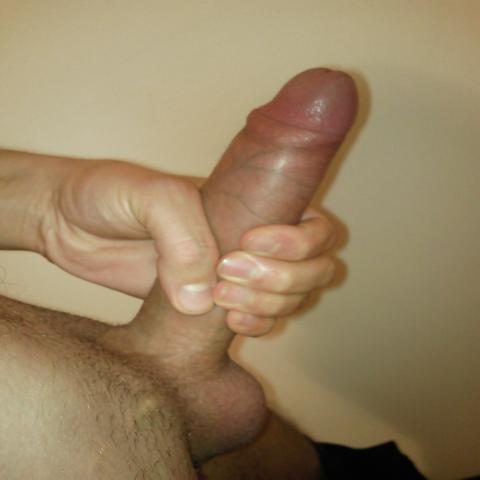

In [620]:


img=tf.keras.utils.load_img('dick1.jpg')
img

In [621]:
arr=tf.keras.preprocessing.image.img_to_array(img)

arr.shape

(480, 480, 3)

In [622]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [623]:
model.predict(img_array)

1/1 [==============================] - 0s 48ms/step


array([[0.5003181]], dtype=float32)

In [624]:
img=resize_image('dick2.png','dick2.jpg')

Image resized and saved to dick2.jpg


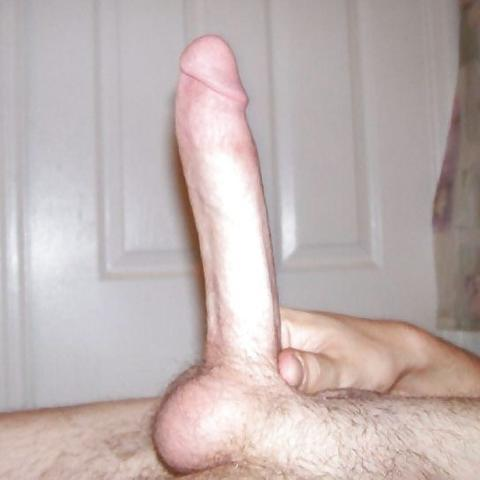

In [625]:


img=tf.keras.utils.load_img('dick2.jpg')
img

In [626]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [627]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [628]:
model.predict(img_array)

1/1 [==============================] - 0s 58ms/step


array([[0.53377646]], dtype=float32)

In [629]:
img=resize_image('penis.png','penis.jpg')

Image resized and saved to penis.jpg


In [630]:
img=resize_image('penis.png','penis.jpg')

Image resized and saved to penis.jpg


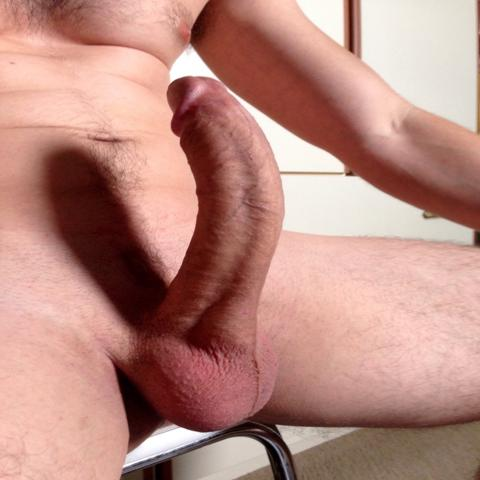

In [631]:


img=tf.keras.utils.load_img('penis.jpg')
img


In [632]:
arr=tf.keras.preprocessing.image.img_to_array(img)
arr.shape

(480, 480, 3)

In [633]:
import numpy as np
img_array = np.expand_dims(arr, axis=0)  # Add batch dimension
img_array.shape

(1, 480, 480, 3)

In [634]:
out=model.predict(tf.keras.utils.image_dataset_from_directory('.',
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(480, 480),
    shuffle=True,
    seed=42,
    interpolation='bilinear'))

Found 268 files belonging to 2 classes.
9/9 [==============================] - 12s 1s/step


In [635]:
model.predict(img_array)

1/1 [==============================] - 0s 49ms/step


array([[0.49417856]], dtype=float32)

In [636]:
out[out.any()>=0.5]

array([[[0.508206  ],
        [0.4979749 ],
        [0.4967312 ],
        [0.52243936],
        [0.49852806],
        [0.49436107],
        [0.49870571],
        [0.5210238 ],
        [0.50004935],
        [0.4980327 ],
        [0.53061074],
        [0.5012301 ],
        [0.4986869 ],
        [0.50597435],
        [0.5210238 ],
        [0.5020556 ],
        [0.51658106],
        [0.52101505],
        [0.50597435],
        [0.51358813],
        [0.5354921 ],
        [0.5002885 ],
        [0.5000629 ],
        [0.50811636],
        [0.5001136 ],
        [0.5156455 ],
        [0.49997205],
        [0.5115196 ],
        [0.49729607],
        [0.5183334 ],
        [0.49618718],
        [0.535821  ],
        [0.5019013 ],
        [0.5065179 ],
        [0.49427718],
        [0.50746804],
        [0.51358813],
        [0.5120905 ],
        [0.49997205],
        [0.51724803],
        [0.50746804],
        [0.5014962 ],
        [0.51485133],
        [0.51111597],
        [0.508173  ],
        [0